<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/flower_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tạo set data (chưa split)

In [51]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [52]:
folder='/content/drive/MyDrive/flower_tonghop/'

In [53]:

photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('apricot'):
    output=1.0
  if file.startswith('bingan'):
    output=2.0
  if file.startswith('daisy'):
    output=3.0
  if file.startswith('lotus'):
    output=4.0
  if file.startswith('waterlily'):
    output=5.0
  if file.startswith('rose'):
    output=6.0
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)


In [54]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/photo_flower.npy',photos)
save('/content/drive/MyDrive/label_flower.npy',labels)

In [55]:
photos.shape

(1083, 100, 100, 3)

In [56]:
labels.shape

(1083,)

split data thành 70% train, 30% test

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)
#test_x, test_y = train_test_split(photos,labels, test_size=0.3)

In [59]:
train_x.shape

(758, 100, 100, 3)

In [60]:
test_x.shape

(325, 100, 100, 3)

scale lại data

In [61]:
train_x = train_x.reshape([758,100,100,3])
train_x = train_x.astype('float32')
train_x = train_x/255

In [62]:
test_x = test_x.reshape([325,100,100,3])
test_x = test_x.astype('float32')
test_x = test_x/255

In [63]:
from keras.utils import to_categorical
y_train = to_categorical(train_y) #hot encoding
y_test = to_categorical(test_y)

In [64]:
train_x.shape

(758, 100, 100, 3)

In [65]:
y_train.shape

(758, 7)

tạo mô hình CNN

In [66]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [67]:
batch_size = 100
epochs = 10
classes = 10

In [80]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3),padding='same'))

In [81]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [82]:
model.add(Flatten())

ANN


In [83]:
model.add(Dense(300,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))


In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                 

In [85]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [101]:
train = model.fit(train_x,y_train,batch_size=100,epochs=5,verbose=1)


Epoch 1/5
8/8 [==============================] - 22s 3s/step - loss: 0.0055 - accuracy: 0.9987
Epoch 2/5
8/8 [==============================] - 20s 3s/step - loss: 0.0080 - accuracy: 0.9987
Epoch 3/5
8/8 [==============================] - 22s 3s/step - loss: 0.0052 - accuracy: 0.9974
Epoch 4/5
8/8 [==============================] - 20s 3s/step - loss: 0.0044 - accuracy: 0.9987
Epoch 5/5
8/8 [==============================] - 21s 3s/step - loss: 0.0051 - accuracy: 0.9974


In [106]:
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

11/11 [==============================] - 4s 356ms/step - loss: 1.3879 - accuracy: 0.7785
Accuracy: 0.7784615159034729
Loss: 1.387947916984558


In [87]:
model.save('/content/drive/MyDrive/flower_detection.h5')

1/1 [==============================] - 0s 125ms/step
[4]
Đây là hoa sen


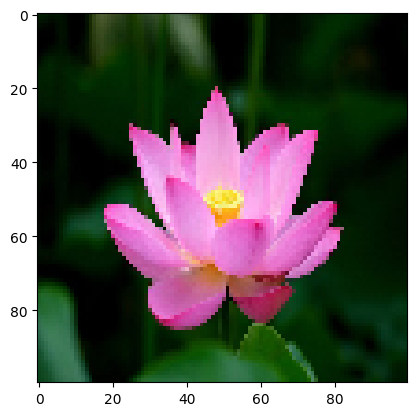

In [107]:
#test mo hinh
from keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('hoasen_test.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Đây là hoa apricot")
if (a == 2):
  print("Đây là hoa bỉ ngạn")
if (a == 3):
  print("Đây là hoa daisy")
if (a == 4):
  print("Đây là hoa sen")
if (a == 5):
  print("Đây là hoa waterlily")
if (a == 6):
  print("Đây là hoa hồng")